In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
k = 1
eratio_min = 1/(1 + 2*k)
eratio_max = 1

In [32]:
def kn_cross_section(eratio: np.ndarray) -> np.ndarray:
    costheta = 1 - (1/eratio - 1) / k
    sin2theta = 1 - costheta ** 2
    return 0.5 * (eratio ** 2) * (eratio + 1/eratio - sin2theta)
    

In [33]:
scale = max(1 / (k * eratio_min**2), 1 / (k * eratio_max**2))


def sample_eratio(size: int):
    sample: list[float] = []
    for _ in range(size):
        while True:
            eratio_try = eratio_min + (eratio_max - eratio_min) * np.random.random()
            value = scale * np.random.random()
            if value < kn_cross_section(eratio_try) / (k * eratio_try**2):
                sample.append(eratio_try)
                break
    return np.array(sample)

In [34]:
eratio_sample = sample_eratio(1000000)

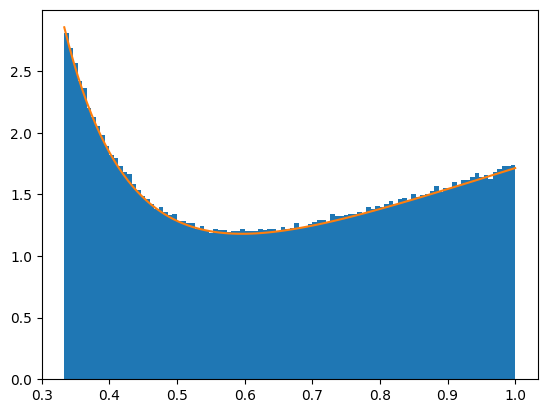

In [35]:
fig, ax = plt.subplots()

ax.hist(eratio_sample, bins=100, density=True)
eratio_linspace = np.linspace(eratio_min, eratio_max, 100)
eratio_pdf = kn_cross_section(eratio_linspace) / (k * eratio_linspace**2)
eratio_pdf /= np.sum(eratio_pdf) * (eratio_linspace[1] - eratio_linspace[0])
ax.plot(eratio_linspace, eratio_pdf)

In [36]:
costheta_sample = 1 - (1 / eratio_sample - 1) / k
theta_sample = np.arccos(costheta_sample)

In [37]:
def eratio_from_theta(theta):
    return 1 / (1 + k * (1 - np.cos(theta)))

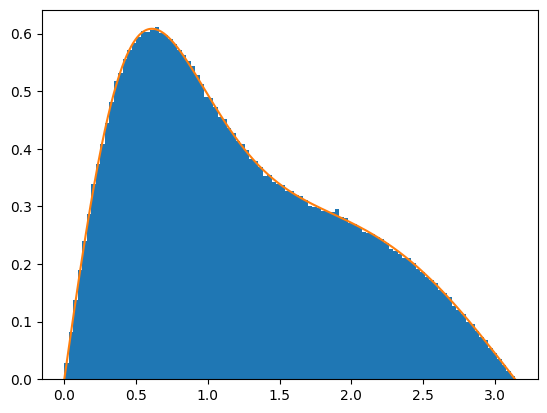

In [38]:
fig, ax = plt.subplots()

ax.hist(theta_sample, bins=100, density=True)
theta_linspace = np.linspace(0, np.pi, 1000)
eratio_from_theta_ = eratio_from_theta(theta_linspace)
theta_pdf = (
    0.5
    * (eratio_from_theta_**2)
    * (eratio_from_theta_ + 1 / eratio_from_theta_ - np.sin(theta_linspace) ** 2)
    * np.sin(theta_linspace)
)
theta_pdf /= np.sum(theta_pdf) * (theta_linspace[1] - theta_linspace[0])
ax.plot(theta_linspace, theta_pdf)

plt.show()